In [ ]:
import numpy as np
import pandas as pd

In [ ]:
books = pd.read_csv('Books.csv')
users = pd.read_csv('Users.csv')
ratings = pd.read_csv('Ratings.csv')


/tmp/ipython-input-2833140351.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books.csv')


# EDA

In [ ]:
users.head()


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
print(books.shape)
print(ratings.shape)
print(users.shape)


(267905, 8)
(1149780, 3)
(278858, 3)


In [ ]:
books.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,2
Year-Of-Publication,0
Publisher,2
Image-URL-S,1
Image-URL-M,1
Image-URL-L,4


In [ ]:
users.isnull().sum()

,0
User-ID,0
Location,0
Age,110762


In [ ]:
ratings.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0


In [ ]:
books.duplicated().sum()

np.int64(0)

In [ ]:
ratings.duplicated().sum()

np.int64(0)

In [ ]:
users.duplicated().sum()

np.int64(0)

In [ ]:
print(books.info())
print(ratings.info())
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267905 entries, 0 to 267904
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 267905 non-null  object
 1   Book-Title           267905 non-null  object
 2   Book-Author          267903 non-null  object
 3   Year-Of-Publication  267905 non-null  object
 4   Publisher            267903 non-null  object
 5   Image-URL-S          267904 non-null  object
 6   Image-URL-M          267904 non-null  object
 7   Image-URL-L          267901 non-null  object
dtypes: object(8)
memory usage: 16.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2),

In [ ]:
ratings['Book-Rating'].value_counts().sort_index()

,count
Book-Rating,
0,716109
1,1770
2,2759
3,5996
4,8904
5,50974
6,36924
7,76457
8,103736


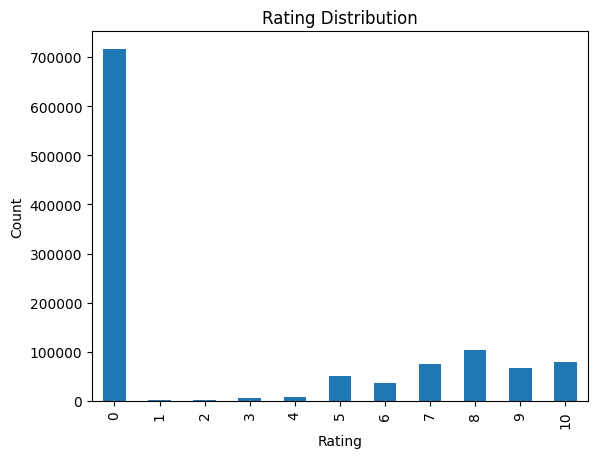

In [ ]:
import matplotlib.pyplot as plt
ratings['Book-Rating'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title("Rating Distribution")
plt.show()

In [ ]:
ratingsP = ratings[ratings['Book-Rating'] !=0]

In [ ]:
ratingsP.groupby('ISBN').count()['Book-Rating'].sort_values(ascending=False).head(10)
# it counts how many rating each book get

,Book-Rating
ISBN,
0316666343,707
0971880107,581
0385504209,487
0312195516,383
0679781587,333
0060928336,320
059035342X,313
0142001740,307
0446672211,295


In [ ]:
rg=ratingsP.groupby('ISBN').mean()['Book-Rating'].sort_values(ascending=False).head(10)
#now we can find average rating per book
rg.sample(10)
#see by this, all books are getting average rating as 10.
#this can occur because books have single rating which is 10 which wrong.

,Book-Rating
ISBN,
2877141500,10.0
0785383743,10.0
"\8887517452\""""",10.0
"\9170010242\""""",10.0
2877141268,10.0
3805206763,10.0
380520700X,10.0
'9607092910',10.0
SBN67001026X,10.0


In [ ]:
# so we do this
book_stats = ratingsP.groupby('ISBN').agg(
    num_ratings=('Book-Rating', 'count'),
    avg_rating=('Book-Rating', 'mean')
)
book_stats.sample(10)

#Instead of choosing:
 #Just highest rating
 #Just most ratings

#I choose:
# Books with many ratings
# And good average rating


,num_ratings,avg_rating
ISBN,,
0007145101,1,9.0
031219546X,1,8.0
1853261599,1,7.0
457600292,1,10.0
0440158060,2,7.0
0060984341,1,6.0
0439253284,1,5.0
8401014603,1,8.0
8845405192,1,6.0


In [ ]:
popular_books_250 = book_stats[book_stats['num_ratings'] > 250]
popular_books_250.sample(10)


,num_ratings,avg_rating
ISBN,,
067976402X,256,7.808594
0971880107,581,4.390706
0671027360,269,8.100372
0385504209,487,8.435318
0316666343,707,8.185290
0316601950,272,7.503676
0446672211,295,8.142373
0060928336,320,7.887500
0452282152,278,7.982014


## How did you define popularity?
I used both average rating and minimum number of ratings to avoid bias from books with very few ratings.”

##Popularity Based Systems ->
does not use any ml models, they use formula to show the most popular books
so we use average rating formula here

##what formula we will use here->

we will show 50 most popular books, with highest average rating, but we will consider only those books who has more than 250 ratings

In [ ]:
ratings.merge(books , on='ISBN').shape
#rating has almost 11L rows but it is showing onnly 10L. why?
# ratings has some books, which are not present in books dataframe

(1027744, 10)

In [ ]:
ratings_with_name = ratings.merge(books , on='ISBN')
ratings_with_name.sample(5)


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
559070,151107,0385335482,0,Confessions of a Shopaholic (Summer Display Op...,SOPHIE KINSELLA,2001,Delta,http://images.amazon.com/images/P/0385335482.0...,http://images.amazon.com/images/P/0385335482.0...,http://images.amazon.com/images/P/0385335482.0...
703290,189973,0836236688,6,Dilbert: Seven Years Of Highly Defective Peopl...,Scott Adams,1997,Andrews McMeel Publishing,http://images.amazon.com/images/P/0836236688.0...,http://images.amazon.com/images/P/0836236688.0...,http://images.amazon.com/images/P/0836236688.0...
4564,278418,0373032897,0,On The Line (Back To The Ranch) (Harlequin Rom...,Anne Marie Duquette,1993,Harlequin,http://images.amazon.com/images/P/0373032897.0...,http://images.amazon.com/images/P/0373032897.0...,http://images.amazon.com/images/P/0373032897.0...
694664,187922,0375411585,0,Eventide,KENT HARUF,2004,Knopf,http://images.amazon.com/images/P/0375411585.0...,http://images.amazon.com/images/P/0375411585.0...,http://images.amazon.com/images/P/0375411585.0...
664174,179744,0140431039,0,Selected Short Fiction (Penguin English Library),Charles Dickens,1976,Penguin Books,http://images.amazon.com/images/P/0140431039.0...,http://images.amazon.com/images/P/0140431039.0...,http://images.amazon.com/images/P/0140431039.0...


## what we will do?
we will group the books by their titles and see the number of rating for each book

##why book title, why not isbn?
because some books are diff ISBN but same name.

In [ ]:
ratings_with_name.groupby('Book-Title').count()['Book-Rating']
#the above is a series
num_rating_dataframe = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
#the above is a dataframe


In [ ]:
num_rating_dataframe.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_dataframe


,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
238096,Ã?Â?lpiraten.,2
238097,Ã?Â?rger mit Produkt X. Roman.,4
238098,Ã?Â?sterlich leben.,1
238099,Ã?Â?stlich der Berge.,3


In [ ]:
avg_rating_df = ratings_with_name.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating_df.rename(columns={'Book-Rating': 'avg_rating'}, inplace=True)
avg_rating_df


,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,Beyond IBM: Leadership Marketing and Finance ...,0.000000
4,Clifford Visita El Hospital (Clifford El Gran...,0.000000
...,...,...
238096,Ã?Â?lpiraten.,0.000000
238097,Ã?Â?rger mit Produkt X. Roman.,5.250000
238098,Ã?Â?sterlich leben.,7.000000
238099,Ã?Â?stlich der Berge.,2.666667


In [ ]:
popular_df = num_rating_dataframe.merge(avg_rating_df,on='Book-Title' )

In [ ]:
popular_df.sample(10)

,Book-Title,num_ratings,avg_rating
232381,Wilderness man: The strange story of Grey Owl,1,8.0
210415,The Way of Harmony: A Guide to Self-Knowledge ...,1,9.0
66419,First You Build a Cloud: And Other Reflections...,1,10.0
212904,The dancing chicken: A novel,2,0.0
237929,"\There I Was ... Flat on My Back\""""",1,9.0
146288,Red Message,4,1.5
179477,The Come-Back Cowboy (Bridgewater Bachelors) ...,2,3.5
79297,HarperCollins College Outline Introduction to ...,1,10.0
215696,Three Plays: Blithe Spirit/Hay Fever/Private L...,3,10.0
142942,Psychic Spawn,4,0.0


In [ ]:
popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False)

,Book-Title,num_ratings,avg_rating
79421,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
79409,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
79428,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
79413,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
79401,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
...,...,...,...
224900,Vinegar Hill (Oprah's Book Club (Paperback)),265,2.245283
230760,Whispers,286,2.199301
141597,Presumed Innocent,294,2.139456
93184,Isle of Dogs,288,2.000000


In [ ]:
popular_df=popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]
# Popularity based ML done!!

In [ ]:
popular_df.head(10)

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,Karen Hesse,http://images.amazon.com/images/P/0590567330.0...,4,2.25
1,Always Have Popsicles,Rebecca Harvin,http://images.amazon.com/images/P/0964147726.0...,1,0.00
2,Apple Magic (The Collector's series),Martina Boudreau,http://images.amazon.com/images/P/0942320093.0...,1,0.00
3,Beyond IBM: Leadership Marketing and Finance ...,Lou Mobley,http://images.amazon.com/images/P/0962295701.0...,1,0.00
4,Clifford Visita El Hospital (Clifford El Gran...,Norman Bridwell,http://images.amazon.com/images/P/0439188970.0...,1,0.00
5,Dark Justice,Jack Higgins,http://images.amazon.com/images/P/0399151788.0...,1,10.00
6,Deceived,Carla Simpson,http://images.amazon.com/images/P/0786000015.0...,2,0.00
7,Earth Prayers From around the World: 365 Pray...,Elizabeth Roberts,http://images.amazon.com/images/P/006250746X.0...,10,5.00
8,Final Fantasy Anthology: Official Strategy Gu...,David Cassady,http://images.amazon.com/images/P/1566869250.0...,4,5.00
9,Flight of Fancy: American Heiresses (Zebra Ba...,Tracy Cozzens,http://images.amazon.com/images/P/082177350X.0...,2,4.00


# Collaborative based


In [ ]:
x=ratings_with_name.groupby('User-ID').count()['Book-Rating']>200
padhe_likhe_users=x[x].index # This is boolean indexing. Show me only the values where the condition is True
# finding the users who has rated > 200 books

In [ ]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(padhe_likhe_users)]

In [ ]:
y=filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [ ]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]
#ye vo books h jisme >50 rating hai

In [ ]:
final_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1150,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1163,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...
1165,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...
1168,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...
1174,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...
...,...,...,...,...,...,...,...,...,...,...
1025813,275970,1400031354,0,Tears of the Giraffe (No.1 Ladies Detective Ag...,Alexander McCall Smith,2002,Anchor,http://images.amazon.com/images/P/1400031354.0...,http://images.amazon.com/images/P/1400031354.0...,http://images.amazon.com/images/P/1400031354.0...
1025814,275970,1400031362,0,Morality for Beautiful Girls (No.1 Ladies Dete...,Alexander McCall Smith,2002,Anchor,http://images.amazon.com/images/P/1400031362.0...,http://images.amazon.com/images/P/1400031362.0...,http://images.amazon.com/images/P/1400031362.0...
1025887,275970,1573229725,0,Fingersmith,Sarah Waters,2002,Riverhead Books,http://images.amazon.com/images/P/1573229725.0...,http://images.amazon.com/images/P/1573229725.0...,http://images.amazon.com/images/P/1573229725.0...
1025925,275970,1586210661,9,Me Talk Pretty One Day,David Sedaris,2001,Time Warner Audio Major,http://images.amazon.com/images/P/1586210661.0...,http://images.amazon.com/images/P/1586210661.0...,http://images.amazon.com/images/P/1586210661.0...


#### by this we can find similar users and similar users will see similar content
this is the idea

In [ ]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
#this is the most important step in collaborative filtering
# it convert row based data to matrix like data
#Collaborative filtering works by: Comparing users
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [ ]:
pt.fillna(0,inplace=True)
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### We will assume every book as a point in 810 dim space, we will find similar vector
### now will find distance of every book with each other using cosine similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_scores = cosine_similarity(pt)
similarity_scores.shape

(705, 705)

In [ ]:
similarity_scores

array([[1.        , 0.10435138, 0.01242298, ..., 0.12323066, 0.07476615,
        0.0439185 ],
       [0.10435138, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01242298, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12323066, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07476615, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.0439185 , 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

### now we will make a function that takes name of a book and suggest 5 similar books

In [ ]:
def recommend(book_name):
  # index fetch
  index = np.where(pt.index==book_name)[0][0]
  distances = similarity_scores[index]
  similar_items = sorted(list(enumerate(similarity_scores[index])), key= lambda x:x[1], reverse=True)[1:6]
  data=[]
  for i in similar_items:
    item=[]
    temp_df = books[books['Book-Title'] == pt.index[i[0]]]
    item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
    item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
    item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
    data.append(item)
  return data


In [ ]:
recommend('Message in a Bottle')

[['Nights in Rodanthe',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446531332.01.MZZZZZZZ.jpg'],
 ['The Mulberry Tree',
  'Jude Deveraux',
  'http://images.amazon.com/images/P/0743437640.01.MZZZZZZZ.jpg'],
 ['A Walk to Remember',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446608955.01.MZZZZZZZ.jpg'],
 ["River's End",
  'Nora Roberts',
  'http://images.amazon.com/images/P/0515127833.01.MZZZZZZZ.jpg'],
 ['Nightmares &amp; Dreamscapes',
  'Stephen King',
  'http://images.amazon.com/images/P/0451180232.01.MZZZZZZZ.jpg']]

In [ ]:
import pickle
pickle.dump(popular_df, open('popular.pkl', 'wb'))

In [ ]:
import pickle
pickle.dump(pt, open('pt.pkl', 'wb'))
pickle.dump(books, open('books.pkl', 'wb'))
pickle.dump(similarity_scores, open('similarity_scores.pkl', 'wb'))